In [183]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import sys

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_row', 1000)

In [5]:
data = pd.read_csv('UCF_TLDClustering.txt', sep="\|\|", engine='python')

In [10]:
data.columns = ["StoreID", "StoreGroup", "PeriodID", "TicketID", "ItemName", "ItemCategory", "Qty", "Sales", "Modifier"]

In [184]:
data.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202{,}F{,}20190302{,}32{,}Apple{,}Automobile{,}1{,}0{,}0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [185]:
data.describe()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202{,}F{,}20190302{,}32{,}Apple{,}Automobile{,}1{,}0{,}0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [22]:
df = pd.DataFrame(data) 

In [27]:
df = df.applymap(lambda x: x.replace('{', ''))

In [28]:
df = df.applymap(lambda x: x.replace('}', ''))

In [186]:
df.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811321 entries, 0 to 12811320
Data columns (total 9 columns):
StoreID         object
StoreGroup      object
PeriodID        object
TicketID        object
ItemName        object
ItemCategory    object
Qty             object
Sales           object
Modifier        object
dtypes: object(9)
memory usage: 879.7+ MB


In [188]:
df.loc[df.isna().any(axis=1),:]

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


In [189]:
df.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202,F,20190302,32,Apple,Automobile,1,0,0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [190]:
df.StoreGroup.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [191]:
df1 = df[df.StoreID =='1']

In [192]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


In [193]:
df1.ItemName.unique()

array(['Chevy Ajax', 'Chevy Spark', 'Chevy Colorado', 'Chevy Gemini',
       'WND', 'Luxury Package', 'Apple', 'Ford Expedition',
       'Bose Speakers', 'Chevy Cavalier', 'Chevy Nova',
       'Ford Quadricycle', 'Rear Spoiler', 'Samsung', 'Ford Focus',
       'Chrysler 300', 'Chrysler Prowler', 'Vehicle Cover',
       'Premium Seat Covers', 'Spare Tire Cover', 'Toyota Tundra',
       'Kia Sedona', 'Ford F150', 'Google', 'Chevy Cobalt', 'Ford E150',
       'Preimum Car Wash', 'Towing Package', 'Ford Camete',
       'French Bulldog', 'Dodge Durango', 'LG', 'Dodge Stratus',
       'Chevy Caprice', 'Allview', 'Ford Taurus', 'Lincoln 2010',
       'Chevy 210', 'Apartment', 'Merida', 'Single Family (Detached)',
       'Golden Retriever', 'Chrysler Fifth Avenue', 'Chrysler Newport',
       'Ford Five Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy TrailBlazer', 'Toyota 4Runner', 'Ford Crown Victoria',
       'Cannondale', 'Ford Explorer Sport-Trac', 'Car Sales Decal',
    

In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null object
StoreGroup      98675 non-null object
PeriodID        98675 non-null object
TicketID        98675 non-null object
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null object
Sales           98675 non-null object
Modifier        98675 non-null object
dtypes: object(9)
memory usage: 7.5+ MB


In [197]:
type(df1)

pandas.core.frame.DataFrame

In [198]:
df1.StoreGroup.unique()

array(['A'], dtype=object)

In [199]:
#df1.ItemName.unique()
df1.ItemCategory.unique()

array(['Automobile', 'Phones', 'Accessories', 'Dogs', 'Homes', 'Bicycle',
       'Color'], dtype=object)

In [200]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


In [201]:
df1['ItemName'] = df1['ItemName'].str.replace(' ','-')
df1

/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury-Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford-Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose-Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy-Spark,Automobile,1,499,0


In [202]:
df1.ItemName.unique()

array(['Chevy-Ajax', 'Chevy-Spark', 'Chevy-Colorado', 'Chevy-Gemini',
       'WND', 'Luxury-Package', 'Apple', 'Ford-Expedition',
       'Bose-Speakers', 'Chevy-Cavalier', 'Chevy-Nova',
       'Ford-Quadricycle', 'Rear-Spoiler', 'Samsung', 'Ford-Focus',
       'Chrysler-300', 'Chrysler-Prowler', 'Vehicle-Cover',
       'Premium-Seat-Covers', 'Spare-Tire-Cover', 'Toyota-Tundra',
       'Kia-Sedona', 'Ford-F150', 'Google', 'Chevy-Cobalt', 'Ford-E150',
       'Preimum-Car-Wash', 'Towing-Package', 'Ford-Camete',
       'French-Bulldog', 'Dodge-Durango', 'LG', 'Dodge-Stratus',
       'Chevy-Caprice', 'Allview', 'Ford-Taurus', 'Lincoln-2010',
       'Chevy-210', 'Apartment', 'Merida', 'Single-Family-(Detached)',
       'Golden-Retriever', 'Chrysler-Fifth-Avenue', 'Chrysler-Newport',
       'Ford-Five-Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy-TrailBlazer', 'Toyota-4Runner', 'Ford-Crown-Victoria',
       'Cannondale', 'Ford-Explorer-Sport-Trac', 'Car-Sales-Decal',
    

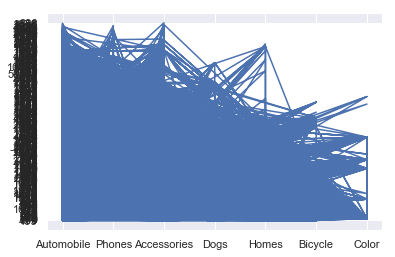

In [203]:
plt.plot(df1.ItemCategory, df1.Sales)
plt.show()

In [204]:
df2 = df1[df1.PeriodID <= '20181231']

In [205]:
df3 = df1[df1.PeriodID >= '20190101']

In [209]:
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null object
StoreGroup      42859 non-null object
PeriodID        42859 non-null object
TicketID        42859 non-null object
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null object
Sales           42859 non-null object
Modifier        42859 non-null object
dtypes: object(9)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55816 entries, 42859 to 98674
Data columns (total 9 columns):
StoreID         55816 non-null object
StoreGroup      55816 non-null object
PeriodID        55816 non-null object
TicketID        55816 non-null object
ItemName        55816 non-null object
ItemCategory    55816 non-null object
Qty             55816 non-null object
Sales           55816 non-null object
Modifier        55816 non-null object
dtypes: object(9)
memory usage: 4.3+ MB


In [210]:
df2.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [212]:
df3.StoreID.iloc[0]

'1'

In [217]:
min(df2.Sales)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0


In [218]:
negativeVal = df2[df2.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0


In [219]:
df2['Sales'] = df2['Sales'].str.replace('-','')
df2

/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury-Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford-Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose-Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy-Spark,Automobile,1,499,0


In [220]:
negativeVal = df2[df2.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


In [222]:
df2['StoreID'] = df2['StoreID'].astype(str).astype(int)
#df2['PeriodID'] = df2['PeriodID'].astype(str).astype(int)
df2['TicketID'] = df2['TicketID'].astype(str).astype(int)
df2['Qty'] = df2['Qty'].astype(str).astype(int)
df2['Sales'] = df2['Sales'].astype(str).astype(int)
df2['Modifier'] = df2['Modifier'].astype(str).astype(int)
#df2['StoreGroup'] = df2['StoreGroup'].astype('str')
#df2['ItemName'] = df2['ItemName'].astype('str')
#df2['ItemCategory'] = df2['ItemCategory'].astype('str')
df2.info()

/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null int64
StoreGroup      42859 non-null object
PeriodID        42859 non-null object
TicketID        42859 non-null int64
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null int64
Sales           42859 non-null int64
Modifier        42859 non-null int64
dtypes: int64(5), object(4)
memory usage: 3.3+ MB


/Users/Sudeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


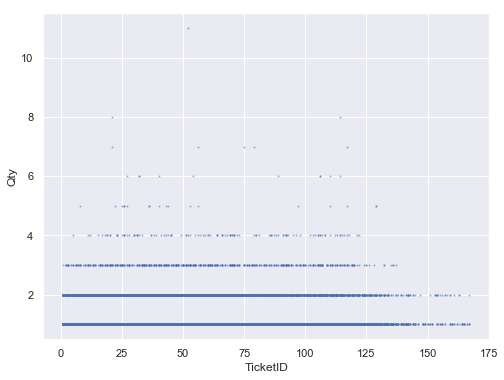

In [223]:
def var_scatter(df2, var):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df2.plot.scatter(x=var , y="Qty", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(df2, "TicketID");

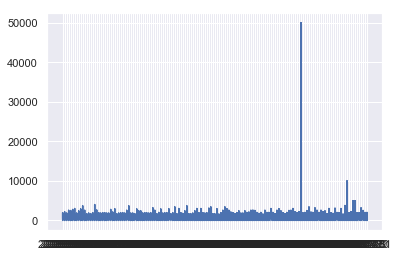

In [224]:
plt.plot(df2.PeriodID, df2.Sales)
plt.show()

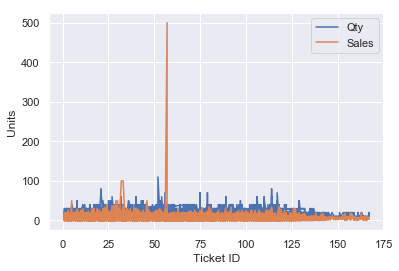

In [243]:
plt.plot(df2.TicketID,df2.Qty * 10)
plt.plot(df2.TicketID,df2.Sales/10**2)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Units')
plt.show()

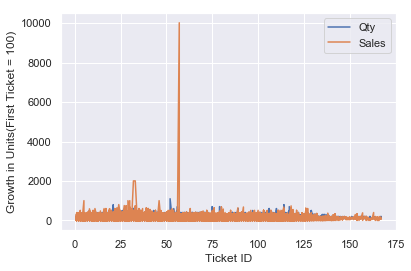

In [255]:
plt.plot(df2.TicketID,df2.Qty / df2.Qty.iloc[0] * 100)
plt.plot(df2.TicketID,df2.Sales / df2.Sales.iloc[0]*100)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Growth in Units(First Ticket = 100)')
plt.show()

In [237]:
maxSalesValue = df2[df2.Sales > 5000]
maxSalesValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
39175,1,A,20181221,32,Keychain,Accessories,1,10000,0
39176,1,A,20181221,33,Keychain,Accessories,1,10000,0


In [239]:
itemKC = df2[df2.ItemName == 'Keychain']
itemKC

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4050,1,A,20180817,24,Keychain,Accessories,1,4000,0
26243,1,A,20181105,25,Keychain,Accessories,1,2500,0
30952,1,A,20181122,34,Keychain,Accessories,1,2500,0
31660,1,A,20181124,11,Keychain,Accessories,1,3000,0
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
34370,1,A,20181203,23,Keychain,Accessories,1,1000,0
35228,1,A,20181207,28,Keychain,Accessories,2,2000,0
36708,1,A,20181212,22,Keychain,Accessories,1,3000,0
39145,1,A,20181221,20,Keychain,Accessories,1,500,0
39172,1,A,20181221,29,Keychain,Accessories,1,5000,0


In [256]:
maxQtyValue = df2[df2.Qty > 5]
maxQtyValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4556,1,A,20180818,114,Apple,Phones,8,1512,0
6772,1,A,20180826,106,WND,Phones,6,0,1
7998,1,A,20180901,56,Google,Phones,7,1393,0
8919,1,A,20180903,79,WND,Phones,7,0,1
11622,1,A,20180914,54,WND,Phones,6,0,1
12140,1,A,20180915,114,Google,Phones,6,1194,0
12621,1,A,20180916,106,LG,Phones,6,1494,0
13451,1,A,20180921,32,WND,Phones,6,0,1
16672,1,A,20181003,32,Google,Phones,6,1194,0
27861,1,A,20181111,27,WND,Phones,6,0,1


In [261]:
zeroSales = df2[df2.Sales == 0]
zeroSales.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,4667.0,4667,4667,4667.000000,4667,4667,4667.000000,4667.0,4667.0
unique,NaN,1,153,NaN,5,3,NaN,NaN,NaN
top,NaN,A,20181118,NaN,WND,Phones,NaN,NaN,NaN
freq,NaN,4667,64,NaN,3850,4109,NaN,NaN,NaN
mean,1.0,NaN,NaN,53.760874,NaN,NaN,1.367474,0.0,1.0
std,0.0,NaN,NaN,33.177054,NaN,NaN,0.688648,0.0,0.0
min,1.0,NaN,NaN,1.000000,NaN,NaN,1.000000,0.0,1.0
25%,1.0,NaN,NaN,26.000000,NaN,NaN,1.000000,0.0,1.0
50%,1.0,NaN,NaN,50.000000,NaN,NaN,1.000000,0.0,1.0
75%,1.0,NaN,NaN,76.000000,NaN,NaN,2.000000,0.0,1.0
